In [35]:
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

In [13]:
data = pd.read_csv('datasets/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<Axes: >

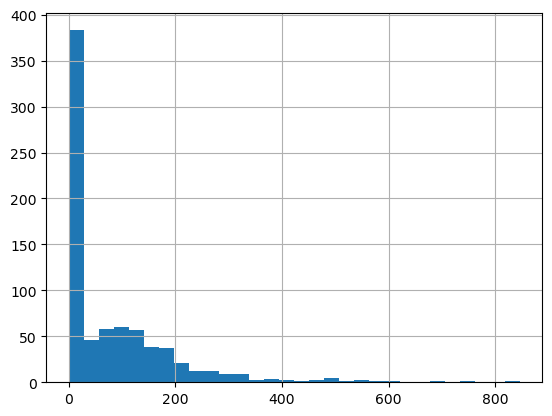

In [6]:
data['Insulin'].hist(bins=30)

In [7]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
zero_skins = data[data['SkinThickness'] == 0]
zero_skins

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
9,8,125,96,0,0,0.0,0.232,54,1
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
757,0,123,72,0,0,36.3,0.258,52,1
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
762,9,89,62,0,0,22.5,0.142,33,0


In [17]:
skin_mean = data[data['SkinThickness'] != 0]['SkinThickness'].mean()
skin_mean

29.153419593345657

In [18]:
data.replace({'SkinThickness'}, skin_mean, inplace=True)

In [19]:
insulin_zeros = data[data['Insulin'] == 0]
insulin_zeros

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
764,2,122,70,27,0,36.8,0.340,27,0
766,1,126,60,0,0,30.1,0.349,47,1


In [20]:
insulin_mean = data[data['Insulin'] != 0]['Insulin'].mean()
insulin_mean

155.5482233502538

In [21]:
data.replace({'Insulin': 0}, insulin_mean, inplace=True)

In [22]:
#
# Second Method
#

In [38]:
data = pd.read_csv('datasets/diabetes.csv')

In [39]:
data.replace({'SkinThickness': 0, 'Insulin': 0}, np.nan, inplace=True)

In [40]:
imputer = KNNImputer(n_neighbors=3)
data.iloc[:, :-1] = imputer.fit_transform(data.iloc[:, :-1])

In [41]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.000000,125.333333,33.6,0.627,50,1
1,1,85,66,29.000000,66.666667,26.6,0.351,31,0
2,8,183,64,30.000000,195.000000,23.3,0.672,32,1
3,1,89,66,23.000000,94.000000,28.1,0.167,21,0
4,0,137,40,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.000000,180.000000,32.9,0.171,63,0
764,2,122,70,27.000000,166.666667,36.8,0.340,27,0
765,5,121,72,23.000000,112.000000,26.2,0.245,30,0
766,1,126,60,35.333333,120.666667,30.1,0.349,47,1


<Axes: >

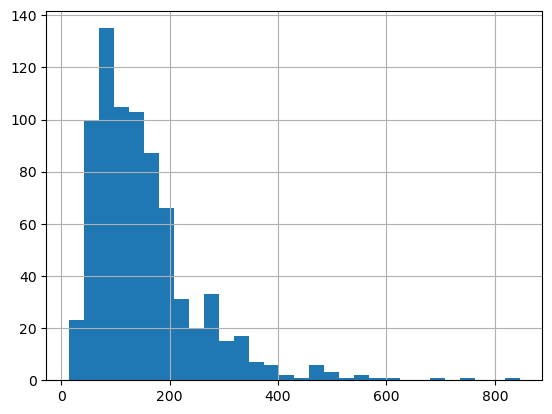

In [42]:
data['Insulin'].hist(bins=30)

<Axes: >

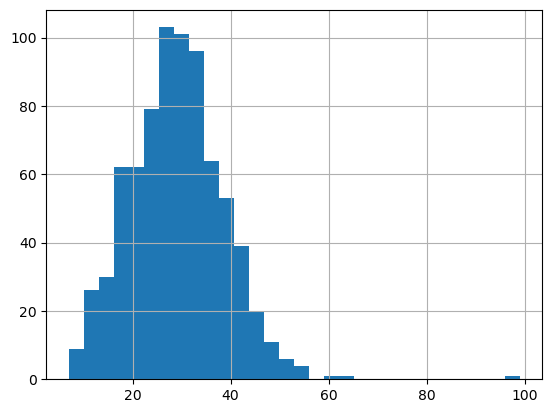

In [43]:
data['SkinThickness'].hist(bins=30)

In [45]:
scaler = MinMaxScaler(feature_range=(0,1))
data.iloc[:, :-1] = scaler.fit_transform(data.iloc[:, :-1])

C:\Users\Diyar\AppData\Local\Temp\ipykernel_21244\3473147991.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.35294118 0.05882353 0.47058824 0.05882353 0.         0.29411765
 0.17647059 0.58823529 0.11764706 0.47058824 0.23529412 0.58823529
 0.58823529 0.05882353 0.29411765 0.41176471 0.         0.41176471
 0.05882353 0.05882353 0.17647059 0.47058824 0.41176471 0.52941176
 0.64705882 0.58823529 0.41176471 0.05882353 0.76470588 0.29411765
 0.29411765 0.17647059 0.17647059 0.35294118 0.58823529 0.23529412
 0.64705882 0.52941176 0.11764706 0.23529412 0.17647059 0.41176471
 0.41176471 0.52941176 0.41176471 0.         0.05882353 0.11764706
 0.41176471 0.41176471 0.05882353 0.05882353 0.29411765 0.47058824
 0.41176471 0.05882353 0.41176471 0.         0.         0.
 0.11764706 0.47058824 0.29411765 0.11764706 0.41176471 0.29411765
 0.         0.11764706 0.05882353 0.23529412 0.11764706 0.29411765
 0.76470588 0.23529

In [46]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.304348,0.133814,0.500745,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.239130,0.063301,0.396423,0.116567,0.166667,0
2,0.470588,0.919598,0.524590,0.250000,0.217548,0.347243,0.253629,0.183333,1
3,0.058824,0.447236,0.540984,0.173913,0.096154,0.418778,0.038002,0.000000,0
4,0.000000,0.688442,0.327869,0.304348,0.185096,0.642325,0.943638,0.200000,1
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.445652,0.199519,0.490313,0.039710,0.700000,0
764,0.117647,0.613065,0.573770,0.217391,0.183494,0.548435,0.111870,0.100000,0
765,0.294118,0.608040,0.590164,0.173913,0.117788,0.390462,0.071307,0.150000,0
766,0.058824,0.633166,0.491803,0.307971,0.128205,0.448584,0.115713,0.433333,1
